In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv', nrows=600)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

In [ ]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [ ]:
df['Rating']=df['Rating'].apply(ratings)

In [ ]:
plt.pie(df['Rating'].value_counts(),labels=df['Rating'].unique().tolist(),autopct='%1.1f%%')
plt.show()

In [ ]:
length=len(df['Review'][0])
print(f'length of a sample review: {length}')

In [ ]:
df['Length']=df['Review'].str.len()
df.head()

In [ ]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

In [ ]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [ ]:
df['Word_count']=df['Review'].apply(word_count)
df.head()

In [ ]:
df['mean_word_length']=df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

In [ ]:
df.info()

In [8]:
import re
from nltk.corpus import stopwords
def clean(review):
    review = review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

import nltk
nltk.download('stopwords')


In [6]:
df['Review']=df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms 4 experience hotel monaco seattle g...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [7]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [9]:
def corpus(text):
    text_list=text.split()
    return text_list

In [10]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


In [11]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 35563.53it/s]


50759

In [12]:
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

[('hotel', 1383),
 ('room', 1106),
 ('great', 575),
 ('stay', 519),
 ('nt', 479),
 ('staff', 424),
 ('seattle', 377),
 ('nice', 374),
 ('rooms', 371),
 ('good', 370)]

In [15]:
words=[]
freq=[]
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

In [ ]:
type(freq)

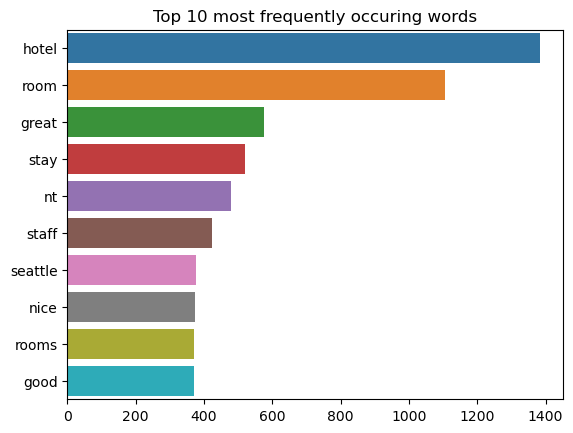

In [16]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 most frequently occuring words')
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['Review'])

In [18]:
count_values=bigrams.toarray().sum(axis=0)
ngram_freq=pd.DataFrame(sorted([(count_values[i],k) for k,i in cv.vocabulary_.items()],reverse=True))
ngram_freq.columns=['frequency','ngram']

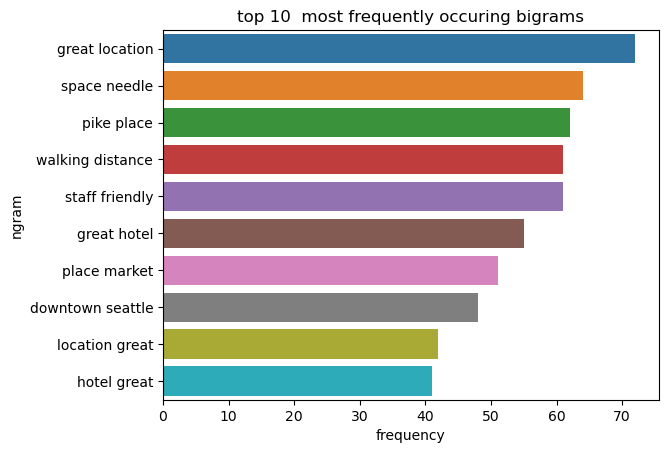

In [21]:
import seaborn as sns
sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['ngram'][:10])
plt.title('top 10  most frequently occuring bigrams')
plt.show()

In [ ]:
doc_trump="Mr. Trump became president after winning the political election."


In [ ]:
from sklearn.feature_extraction.text import CountVextorizer
import pandas as pd
count_vect=CountVectorizer(stop_words='english')
count_vect=CountVectorizer()
sparse_matrix=count_vect.fit_transform(documents)
doc_term_matrix=sparse_matrix.todense()
df=pd.DataFrame(doc_)